### Identifying the Different Classes

In [ ]:
import pandas as pd

csvClasses = r"D:\\Suvan's Projects\\FYP\\Durian Diseases.v1-420-origi.multiclass\\train\\_classes.csv"
df_columns = pd.read_csv(csvClasses)

print("Columns in CSV:", df_columns.columns)

Columns in CSV: Index(['filename', 'Algal Leaf Spot', 'Leaf Blight', 'Leaf Spot',
       'No Disease'],
      dtype='object')


### Loading the Dataset & Extracting Metadata of Images

In [ ]:
import os
from PIL import Image

# Define the image dataset directory path
imageDataset = r"D:\\Suvan's Projects\\FYP\\Durian Diseases.v1-420-origi.multiclass\\train"
df_classes = pd.read_csv(csvClasses)
df_classes.columns = df_classes.columns.str.strip()

# Initialize a list to store image metadata
image_data = []

# Iterate through images in the dataset directory
for file in os.listdir(imageDataset):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Common image formats
        file_path = os.path.join(imageDataset, file)

        # Extract the image filename excluding the file extension itself
        filename_without_ext = os.path.splitext(file)[0].strip()  # Strip spaces from the filename

        # Attempt to find an exact match in the class CSV using the filename
        match = df_classes[df_classes['filename'].str.strip().str.split('.').str[0] == filename_without_ext]

        if match.empty:
            print(f"Filename not found in CSV: {filename_without_ext}")  # Notify if no match is found
        else:
            # Ensure only one row matches
            match = match.iloc[0]

            # Create the disease label based on the binary columns
            diseases = []
            if match['Algal Leaf Spot'] == 1:
                diseases.append('Algal_Leaf_Spot')  # Specific match for Algal Leaf Spot
            elif match['Leaf Spot'] == 1:
                diseases.append('Leaf_Spot')  # Generic Leaf Spot
            if match['Leaf Blight'] == 1:
                diseases.append('Leaf_Blight')
            if match['No Disease'] == 1:
                diseases.append('No_Disease')

            # Create the label string by joining the diseases
            label = "_".join(diseases) if diseases else "Healthy"

            # Open the image to get its metadata
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_format = img.format

                    # Append the metadata to the list
                    image_data.append({
                        "filename": file,
                        "label": label,
                        "width": width,
                        "height": height,
                        "format": image_format
                    })
            except Exception as e:
                print(f"Error reading file {file}: {e}")

# Convert the metadata into a DataFrame
df_metadata = pd.DataFrame(image_data)

# Save the corrected metadata to a new CSV file for reference
df_metadata.to_csv("image_dataset_metadata.csv", index=False)

# Display the first few rows of the corrected DataFrame
df_metadata.head(420)

,filename,label,width,height,format
0,Algal_Leaf_Spot_1.jpg,Algal_Leaf_Spot,640,640,JPEG
1,Algal_Leaf_Spot_10.jpg,Algal_Leaf_Spot,640,640,JPEG
2,Algal_Leaf_Spot_100.jpg,Algal_Leaf_Spot,640,640,JPEG
3,Algal_Leaf_Spot_101.jpg,Algal_Leaf_Spot,640,640,JPEG
4,Algal_Leaf_Spot_102.jpg,Algal_Leaf_Spot,640,640,JPEG
...,...,...,...,...,...
415,No_Disease_95.jpg,No_Disease,640,640,JPEG
416,No_Disease_96.jpg,No_Disease,640,640,JPEG
417,No_Disease_97.jpg,No_Disease,640,640,JPEG
418,No_Disease_98.jpg,No_Disease,640,640,JPEG


### Class Distribution of Images


Class Distribution:
label
Algal_Leaf_Spot         105
Leaf_Blight             105
No_Disease              105
Leaf_Spot               103
Leaf_Spot_No_Disease      2
Name: count, dtype: int64


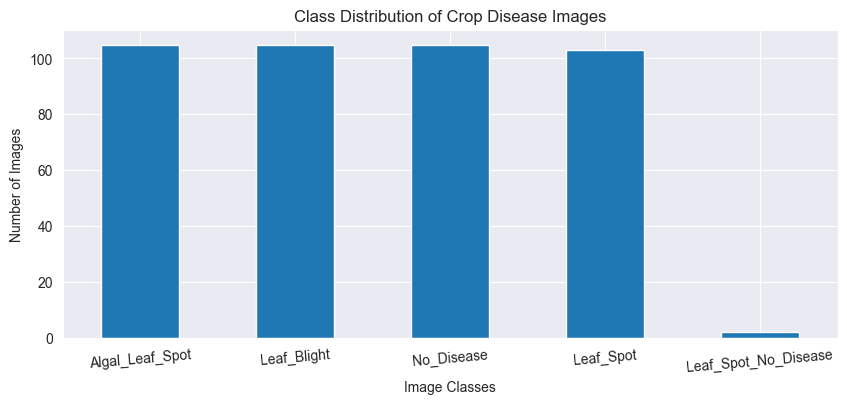

In [ ]:
from matplotlib import pyplot as plt

# Display a summary of the class distribution
print("\nClass Distribution:")
class_distribution = df_metadata['label'].value_counts()
print(class_distribution)

# Visualizing the class distribution into a bar chart
plt.figure(figsize=(10, 4))
class_distribution.plot(kind='bar')
plt.title("Class Distribution of Crop Disease Images")
plt.xlabel("Image Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=5)
plt.show()

### Plotting the Distribution of Image Dimensions


Image Dimensions Summary:
Minimum Dimensions: (np.int64(640), np.int64(640))
Maximum Dimensions: (np.int64(640), np.int64(640))


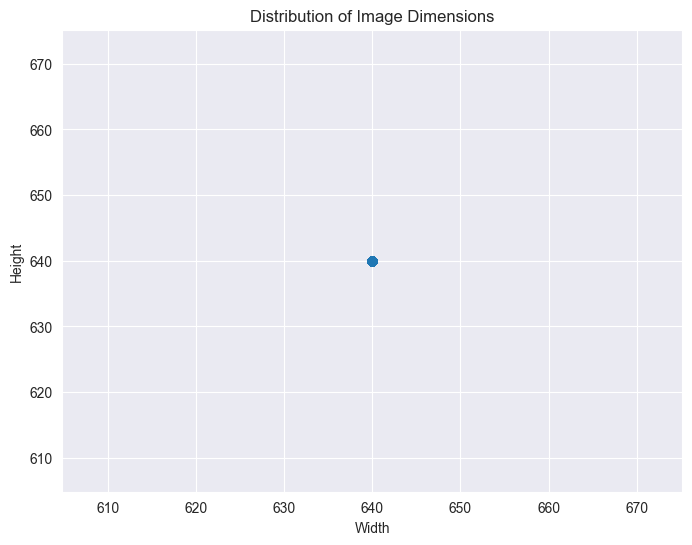

In [ ]:
from matplotlib import pyplot as plt

# Finding the minimum and maximum dimensions of the images in dataset.
print("\nImage Dimensions Summary:")
print("Minimum Dimensions:", (df_metadata['width'].min(), df_metadata['height'].min()))
print("Maximum Dimensions:", (df_metadata['width'].max(), df_metadata['height'].max()))

# Visualizing the distribution of image dimension into a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_metadata['width'], df_metadata['height'], alpha=0.5)
plt.title("Distribution of Image Dimensions")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

### Sampling Images from Dataset


Sample Images:


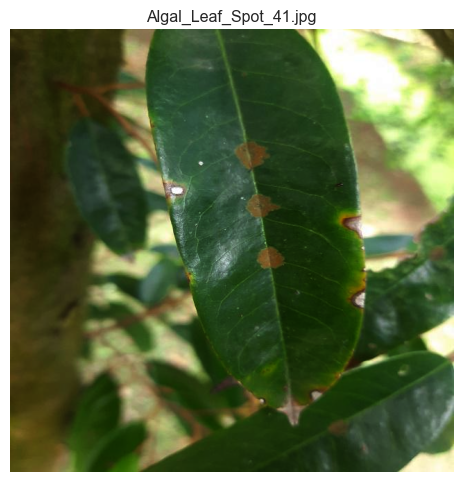

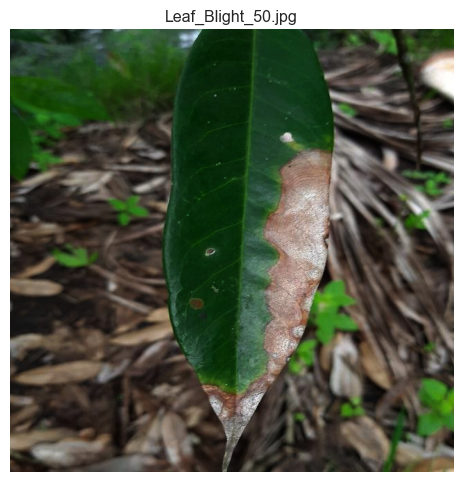

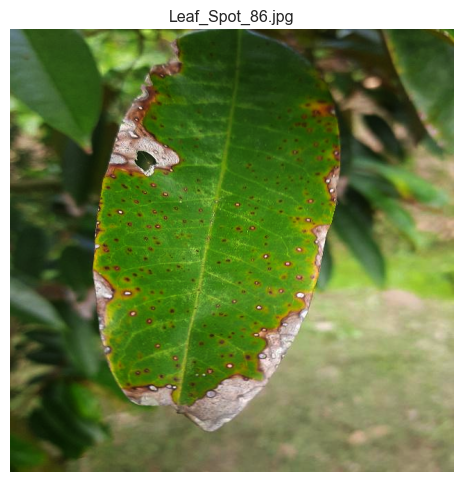

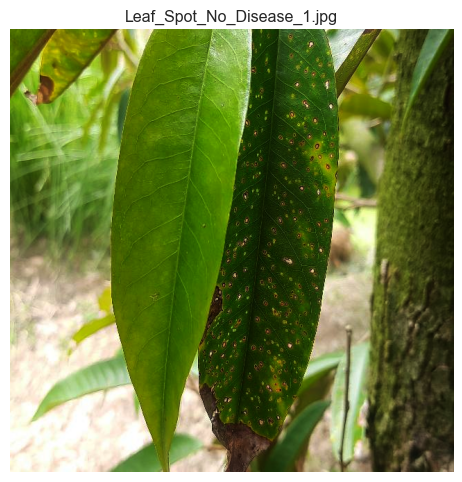

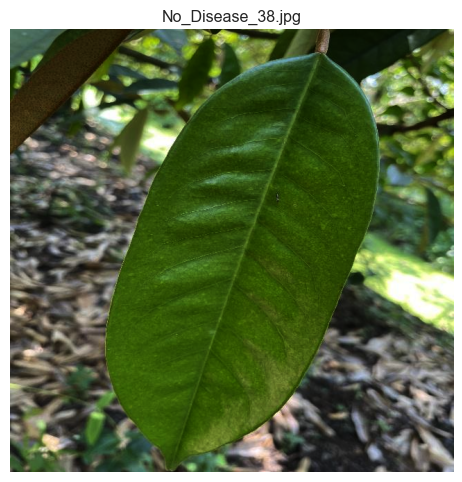

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Group images by class label
class_groups = df_metadata.groupby('label')['filename'].apply(list).to_dict()

# Select one random image per class
sample_images = {label: random.choice(files) for label, files in class_groups.items()}

print("\nSample Images:")

# Display the selected images
for label, file in sample_images.items():
    file_path = os.path.join(imageDataset, file)

    # Open image and strip color profile
    img = Image.open(file_path).convert("RGB")
    img_array = np.array(img)

    # Normalize pixel values to [0, 1]
    img_array_normalized = img_array / 255.0

    # Apply gamma correction (optional)
    gamma = 1.5  # Adjust gamma value as needed
    img_array_corrected = np.power(img_array_normalized, gamma)

    # Display image using Matplotlib
    plt.figure(figsize=(6,6), dpi= 96)
    plt.imshow(img_array_corrected, vmin=0, vmax=1)
    plt.title(f"{file}")
    plt.axis("off")
    plt.show()

### Plotting Distribution of Image Format

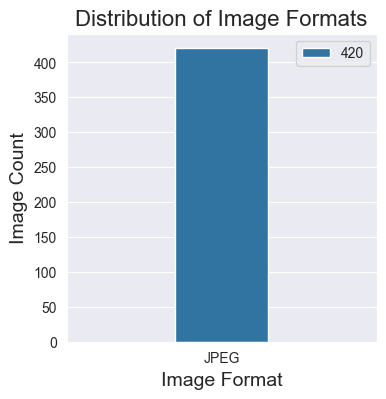

In [ ]:
import seaborn as sbn

# Calculating the count of images of a specific format
imgFormat = df_metadata['format'].value_counts()

# Create a bar plot to visualize the distribution of image formats
plt.figure(figsize=(4, 4))
sbn.barplot(x= imgFormat.index, y= imgFormat.values, width = 0.3, label = imgFormat.values)
plt.title("Distribution of Image Formats", fontsize= 16)
plt.xlabel("Image Format", fontsize= 14)
plt.ylabel("Image Count", fontsize= 14)
plt.xticks(rotation= 0)
plt.show()


### Checking for Corrupted Images

In [ ]:
corrupted_files = []

for file in os.listdir(imageDataset):
    file_path = os.path.join(imageDataset, file)
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Check for common image formats
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify image integrity
        except Exception as e:
            print(f"Corrupted file detected: {file}")
            corrupted_files.append(file)

# Print corrupted files
if corrupted_files:
    print("\nCorrupted Files:")
    print(corrupted_files)
else:
    print("\nNo corrupted files found.")


No corrupted files found.


### Checking for Duplicate Images using Perceptual Hashing

In [2]:
import imagehash
import os
from PIL import Image

imageDataset = r"D:\\Suvan's Projects\\FYP\\Durian Diseases.v1-420-origi.multiclass\\train"

hashes = {}
duplicates = []

for class_name in os.listdir(imageDataset):
    class_folder = os.path.join(imageDataset, class_name)
    if os.path.isdir(class_folder):
        for file in os.listdir(class_folder):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(class_folder, file)
                img = Image.open(file_path)
                img_hash = imagehash.phash(img)  # Generate perceptual hash

                if img_hash in hashes:
                    duplicates.append((file, hashes[img_hash]))  # Store duplicate pairs
                else:
                    hashes[img_hash] = file  # Store hash in dictionary

print(f"Found {len(duplicates)} duplicate images.")

Found 0 duplicate images.


### Analyzing the Color Distribution of Images

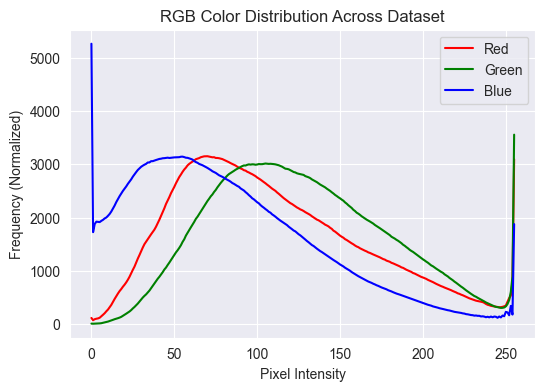

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your image dataset
imageDataset = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"

# Initialize histograms for R, G, B channels
hist_r = np.zeros(256)
hist_g = np.zeros(256)
hist_b = np.zeros(256)

# Count images processed
image_count = 0

# Process each image
for file in os.listdir(imageDataset):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Common image formats
        file_path = os.path.join(imageDataset, file)

        # Read image using OpenCV (BGR format)
        img = cv2.imread(file_path)

        if img is None:
            continue

        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Compute histogram for each channel
        hist_r += cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
        hist_g += cv2.calcHist([img], [1], None, [256], [0, 256]).flatten()
        hist_b += cv2.calcHist([img], [2], None, [256], [0, 256]).flatten()

        image_count += 1

# Normalize histograms
hist_r /= image_count
hist_g /= image_count
hist_b /= image_count

# Plot the histograms
plt.figure(figsize=(6, 4))
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')

plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency (Normalized)")
plt.title("RGB Color Distribution Across Dataset")
plt.legend()
plt.show()


### Brightness Distribution Analysis

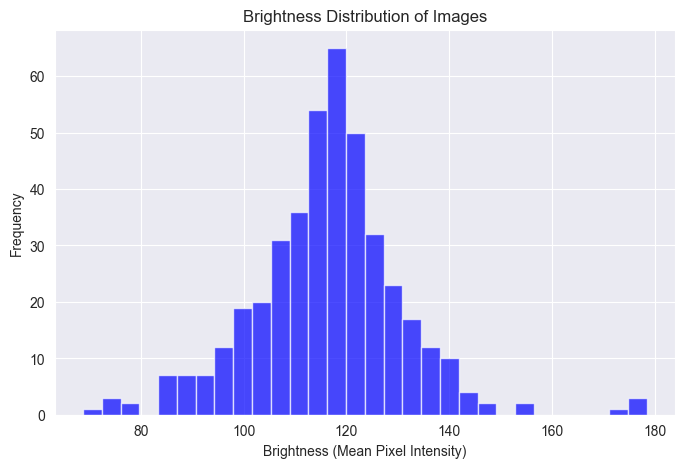

In [ ]:
brightness_values = []

for file in os.listdir(imageDataset):
    file_path = os.path.join(imageDataset, file)
    if file.endswith(('.jpg', '.jpeg', '.png')):
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        brightness = np.mean(img)  # Calculate mean intensity
        brightness_values.append(brightness)

# Plot Brightness Distribution
plt.figure(figsize=(8, 5))
plt.hist(brightness_values, bins=30, color='blue', alpha=0.7)
plt.xlabel("Brightness (Mean Pixel Intensity)")
plt.ylabel("Frequency")
plt.title("Brightness Distribution of Images")
plt.show()